# COGS 108 - Sleep Efficiency Analytics
COLLECTION TIME: FRIDAY

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

This project analyzes different demographic characteristics and lifestyle habits that may affect an individual's sleep efficiency to see which factors best predict an individual's ability to get good quality sleep. We hypothesized the following: 1) for demographic factors, older individuals will have lower sleep scores while gender will not have a significant impact on sleep score 2) for lifestyle habits, individuals with "negative" lifestyle habits (not exercising regularly, frequent alcohol consumption) will have lower sleep scores and 3) lifestyle habits will provide a more accurate prediction of sleep score than demographic factors. 

We conclude that an individual's lifestyle habits provides a more accurate prediction of an individual's sleep score when compared to demographic factors – more specifically, although caffeine did not have a strong correlation, bedtime, exercise, smoking status and alcohol showed strong positive/negative correlations. 

# Names

- Leena Kang
- Stephanie Park
- Jorge Miguel Hernandez
- Nicholas Azpeitia

<a id='research_question'></a>
# Research Question

What (if any) effect do demographic factors such as gender and age have in determining an individual's sleep efficiency? What (if any) effect do living habits (smoking, drinking, caffeine consumption and exercise) have in determining an individual's sleep efficiency? Which of the two provides a more accurate prediction of an individual's sleep efficiency?

<a id='background'></a>

## Background & Prior Work

The biological process of sleep is essential to proper mental functioning and physical maintenance of the human body. Especially as college students, it is pivotal that we understand how sleep can affect our ability to take care of ourselves and perform well both academically and socially. 

There are typically 4 stages of sleep that an individual cycles through each night: Stage 1, Stage 2, Stage 3 and REM Sleep [^1]. While there is no singular definition of good sleep efficiency, it is often associated with Stage 3, or Deep Sleep Cycle, which offers a variety of physical and mental benefits in comparison to the other 3 stages. For example, during the Deep Sleep phase, the body repairs and grows new tissue, regulates and releases important hormones and consolidates memory [^2]. As such, analyzing the different factors that could improve or impair one’s sleep efficiency and ensure that an individual experiences deep sleep each night is crucial. 

Extensive research has already been done on how various internal and external factors impact one’s ability to sleep. One study shows how sleep patterns may change for different age groups: as individuals grow older, they tend to have more difficulty with falling asleep and waking up more frequently throughout the night [^3]. Additionally, the total sleep time for older age groups is usually only 6-6.5 hours which is less than the recommended average of 7-9 hours [^4]. Other studies examine how commonly consumed substances such as caffeine and alcohol can disrupt the body’s ability to fall asleep and enter the Deep Sleep stage. Frequently drinking caffeine not only delays the timing of your body’s circadian rhythms but can reduce sleep time by as much as 1 hour [^5]. Drinking alcohol also prevents the body from entering the more important stages of sleep, leading individuals to feel unrested when they wake up [^6]. Even elements in one’s sleeping environment have the potential to influence his or her sleep quality. Studies show that people tend to sleep better with specific temperatures, noise levels and lights [^7]. Given the wide variety of factors that can impact sleep efficiency, it is important to see which factors are most important in predicting one’s sleep efficiency and understand what kinds of effects they have on sleep efficiency overall. 

[^1]: https://www.sleepfoundation.org/stages-of-sleep/deep-sleep
[^2]: https://www.healthline.com/health/how-much-deep-sleep-do-you-need#stages
[^3]: https://medlineplus.gov/ency/article/004018.htm
[^4]: https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html 
[^5]: https://sleepeducation.org/sleep-caffeine/ 
[^6]: https://www.drinkaware.co.uk/facts/health-effects-of-alcohol/effects-on-the-body/alcohol-and-sleep 
[^7]: https://www.sleepfoundation.org/bedroom-environment 

References:
1) https://www.sleepfoundation.org/stages-of-sleep/deep-sleep
2) https://www.healthline.com/health/how-much-deep-sleep-do-you-need#stages
3) https://medlineplus.gov/ency/article/004018.htm
4) https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html 
5) https://sleepeducation.org/sleep-caffeine/ 
6) https://www.drinkaware.co.uk/facts/health-effects-of-alcohol/effects-on-the-body/alcohol-and-sleep 
7) https://www.sleepfoundation.org/bedroom-environment

# Hypothesis


Utilizing data on an individual’s lifestyle habits & demographics in addition to observations on his/her sleep patterns, we can create a model that gives each individual a “sleep score” that measures one’s quality of sleep. For demographic factors, we predict that older individuals will have a lower sleep score & that gender will not have a significant impact on one’s sleep score. We predict that people with “negative” lifestyle habits such as substance use of caffeine or lack of exercise will have a lower sleep score. Out of the two categories, we predict that lifestyle habits will provide a more accurate prediction of an individual’s sleep score when compared to demographic factors since lifestyle habits have greater potential to impact the body's ability to fall asleep and stay asleep. 

# Setup

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

from datetime import datetime

In [2]:
# reading dataset
sleep = pd.read_csv('Sleep_Efficiency.csv')

# Dataset

- Dataset Name: **Sleep Efficiency Dataset**
- Link to the dataset: https://www.kaggle.com/datasets/equilibriumm/sleep-efficiency
- Number of observations: 452

Here below are the first 5 rows of the Sleep Efficiency Dataset:

In [3]:
sleep.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


This dataset shows each individual's sleeping patterns (_where one row represents one person, uniquely identified by their 'ID'_) and sleep efficiency along with their some of their living habits. It contains various datatypes including floats, integers, and Strings _(including the 'Bedtime' and 'Wakeup time' columns)_.


Here below explains what each number represents for each column, according to Kaggle:

#### Columns in Sleep Efficiency Dataset:

- `Sleep duration`: total amount of time (in hours) each subject has slept


- `Sleep Efficiency`: proportion of time spent in bed that is actually spent asleep 


- `REM sleep percentage`: % of total sleep time spent in REM sleep


- `Deep sleep percentage`: % of total sleep time spent in deep sleep 


- `Light sleep percentage` : % of total sleep time spent in light sleep


- `Awakenings`: number of times each the subject woke up during the night 


- `Caffeine consumption`: amount consumed (mg) consumed 24 hours prior to bedtime


- `Alcohol consumption`: amount consumed (oz) 24 hours prior to bedtime 


- `Smoking status`: Yes/No, indicating whether subject smokes or not


- `Exercise frequency`: number of times subject exercises each week

# Data Cleaning

### 1. Understanding the Data

First, lets get a general idea of what our dataset looks like

In [4]:
shape = sleep.shape
print('Number of Rows: ' + str(shape[0]) + '\nNumber of Columns: ' + str(shape[1]))
sleep.head()

Number of Rows: 452
Number of Columns: 15


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

`sleep` appears to consist of **String** objects, **integers**, and **floats**. It is also worth noting that some of the columns have a number of null values, which we will handle shortly.

Below are general statistics for each column (excluding columns with that consist of Strings):

In [6]:
sleep.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


### 2. Cleaning Columns

We renamed the columns for conciseness; that way, it will be more convenient for us whenever we want to reference a certain column.

Below are the names of the columns before we renamed them:

In [7]:
sleep.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

Here we lowercased all strings and changed any column with "percentage" into "%" for convenience.

In [8]:
# making everything lowercase
sleep = sleep.rename(columns=str.lower)

# chaning 'percentage' to '%'
sleep = sleep.rename(columns={'rem sleep percentage': 'rem sleep %',
                     'deep sleep percentage': 'deep sleep %',
                     'light sleep percentage': 'light sleep %'})
sleep.columns

Index(['id', 'age', 'gender', 'bedtime', 'wakeup time', 'sleep duration',
       'sleep efficiency', 'rem sleep %', 'deep sleep %', 'light sleep %',
       'awakenings', 'caffeine consumption', 'alcohol consumption',
       'smoking status', 'exercise frequency'],
      dtype='object')

Lets take a look at the `sleep` DataFrame once more:

In [9]:
sleep.head()

,id,age,gender,bedtime,wakeup time,sleep duration,sleep efficiency,rem sleep %,deep sleep %,light sleep %,awakenings,caffeine consumption,alcohol consumption,smoking status,exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


We see that `id` simply lists numbers from 1-452, which serves as the same purpose as the index. 

Here, there are two viable options: (1) We implement `sleep.set_index('id')` to set the index as the `id` column, or (2) drop the `id` column. We decided to drop `id`. 

In [10]:
# Drop ID number
sleep = sleep.drop(['id'], axis = 1)

In [11]:
sleep.head()

,age,gender,bedtime,wakeup time,sleep duration,sleep efficiency,rem sleep %,deep sleep %,light sleep %,awakenings,caffeine consumption,alcohol consumption,smoking status,exercise frequency
0,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


### 3. Null Values and Unfeasible Data

#### Checking for Null Values

In [12]:
print('Total Number of Null Values: ' + str(sleep.isnull().sum().sum()))
sleep.isnull().sum()

Total Number of Null Values: 65


age                      0
gender                   0
bedtime                  0
wakeup time              0
sleep duration           0
sleep efficiency         0
rem sleep %              0
deep sleep %             0
light sleep %            0
awakenings              20
caffeine consumption    25
alcohol consumption     14
smoking status           0
exercise frequency       6
dtype: int64

It appears that only the columns `awakenings`, `caffeine consumtion`, `alcohol consumption`, and `exercise frequency`) contain null values.

Since not too much data will be lost, we decided to drop all rows that contains **at least** one null value. 

In [13]:
# Drop null values
sleep = sleep.dropna()

#### Checking for Unfeasible Values 

Here we will check if there are values that are unreasonable, and dropping/changing the rows that does contain unreasonable values _(as this could potentially skew our calculations and visualizations)_. 

We will check to ensure the following: 

- `sleep efficiency` only contains values from 0 to 1


- `rem sleep % `, `deep sleep %`, and `light sleep %` only contains values from 0-100


- `sleep duration`, `awakenings`, `caffeine consumption`, `alcohol consumption`, and `exercise frequency` only contains positive integers/floats 


- `smoking status` only contains values String values of 'Yes' or 'No'

In [14]:
sleep[((sleep['sleep efficiency'] < 0) & (sleep['sleep efficiency'] > 1)) |
     ((sleep['rem sleep %'] < 0) & (sleep['rem sleep %'] > 100)) |
     ((sleep['deep sleep %'] < 0) & (sleep['deep sleep %'] > 100)) |
     ((sleep['light sleep %'] < 0) & (sleep['light sleep %'] > 100)) |
     (sleep['sleep duration'] < 0) |
     (sleep['awakenings'] < 0) |
     (sleep['caffeine consumption'] < 0) |
     (sleep['alcohol consumption'] < 0) |
     ((sleep['smoking status'] != 'Yes') & (sleep['smoking status'] != 'No'))]

,age,gender,bedtime,wakeup time,sleep duration,sleep efficiency,rem sleep %,deep sleep %,light sleep %,awakenings,caffeine consumption,alcohol consumption,smoking status,exercise frequency


It appears that all values in the dataset meets the conditions listed above!

### 4.  Cleaning `bedtime` and `wakeup time` 

Lets take a look at the first values in `bedtime` and `wakeup time` : 

In [15]:
sleep['bedtime'].iloc[0]

'2021-03-06 01:00:00'

In [16]:
sleep['wakeup time'].iloc[0]

'2021-03-06 07:00:00'

First, these values are **Strings**, which may not be as useful since this represents time. Secondly, the date in which each subject slept is not useful for this project--we are more concerned with **what time** they went to bed/woke up. 

`bedtime` and `wakeup time` would be more useful for our purposes if they included **float** values that represents the **hour** in which they went to bed/woke up (_that is, what time each subject went to bed/woke up in military time_) 

In [17]:
# converting wakeup time and bedtime to datetime
sleep['bedtime'] = pd.to_datetime(sleep['bedtime'])
sleep['wakeup time'] = pd.to_datetime(sleep['wakeup time'])

In [18]:
# changing bedtime and wakeup to the hour

def to_hour(dt):
    dt_str = str(dt.time())
    hour = float(dt_str.split(":")[0])
    minutes = float(dt_str.split(":")[1])
    min_prop = minutes / 60
    
    return hour + min_prop

sleep['bedtime'] = sleep.get('bedtime').apply(to_hour)
sleep['wakeup time'] = sleep.get('wakeup time').apply(to_hour)

sleep.head()

,age,gender,bedtime,wakeup time,sleep duration,sleep efficiency,rem sleep %,deep sleep %,light sleep %,awakenings,caffeine consumption,alcohol consumption,smoking status,exercise frequency
0,65,Female,1.0,7.0,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,69,Male,2.0,9.0,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,21.5,5.5,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,2.5,8.5,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,1.0,9.0,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


# Data Analysis & Results

## Visualizing Distributions

To get a better understanding of what our data looks like, lets first visualize the distribution of each column.

#### Demographics

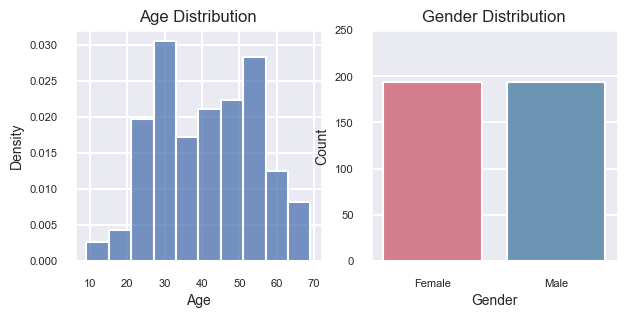

In [19]:
# demographics 
plt.figure(figsize=(7,3))

plt.subplot(1,2,1)
sns.histplot(data=sleep, x='age', stat='density')
plt.title('Age Distribution', fontsize=12)
plt.tick_params(labelsize=8)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Density',fontsize=10)

plt.subplot(1,2,2)
sns.countplot(x=sleep.get('gender'),palette=['#e36f84', "#6097bf"])
plt.ylim(0,250)
plt.tick_params(labelsize=8)
plt.xlabel('Gender',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Gender Distribution', fontsize = 12)

plt.show()

**Key Takeaways:** 
- There is an even distribution between Female and Male subjects, where majority of them are approximately between 30-50 years old. 

#### LIfestyle 

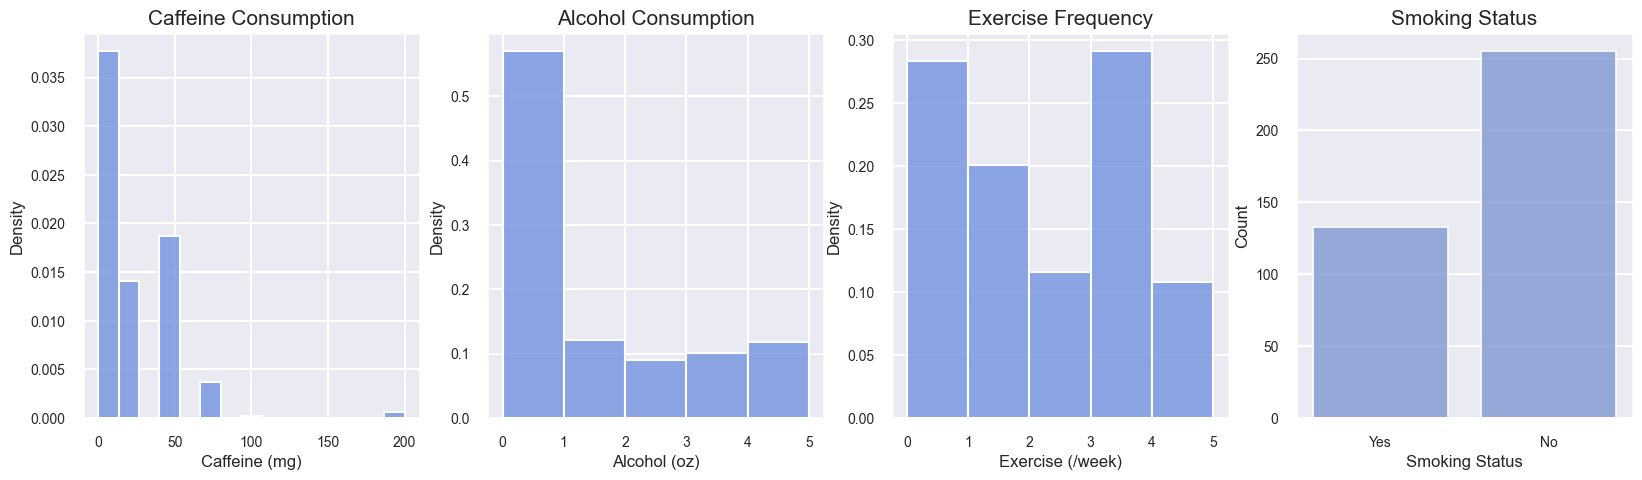

In [20]:
# lifestyle - caffeine, alcohol, smoking , exercise
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.histplot(data=sleep, x='caffeine consumption', stat='density',color ='#7293e0',alpha=0.8)
plt.title('Caffeine Consumption', fontsize=15)
plt.tick_params(labelsize=10)
plt.xlabel('Caffeine (mg)',fontsize=12)
plt.ylabel('Density',fontsize=12)

plt.subplot(1,4,2)
sns.histplot(data=sleep, x='alcohol consumption', stat='density', bins=5,color ='#7293e0',alpha=0.8)
plt.title('Alcohol Consumption', fontsize=15)
plt.tick_params(labelsize=10)
plt.xlabel('Alcohol (oz)',fontsize=12)
plt.ylabel('Density',fontsize=12)

plt.subplot(1,4,3)
sns.histplot(data=sleep, x='exercise frequency', stat='density', bins=5,color ='#7293e0',alpha=0.8)
plt.title('Exercise Frequency', fontsize=15)
plt.tick_params(labelsize=10)
plt.xlabel('Exercise (/week)',fontsize=12)
plt.ylabel('Density',fontsize=12)

plt.subplot(1,4,4)
sns.countplot(x=sleep.get('smoking status'), color ='#7293e0', alpha=0.8)
plt.tick_params(labelsize=10)
plt.xlabel('Smoking Status',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Smoking Status', fontsize = 15)

plt.show()

**Key Takeaways:** 

- `caffeine consumption`: Majority of subjects did not consume caffeine 24 hours before their bedtime. 

- `alcohol consumption`: Majority of subjects did not consume caffeine 24 hours before their bedtime. 

- `exercise frequency`: Most subjects either did not exercise or exercise 3 times a week. 

- `smoking status`: Must subjects do not smoke. 


#### Sleep Schedules 

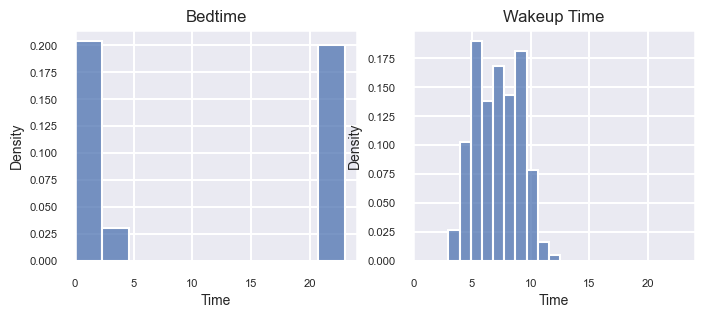

In [21]:
# sleep schedules 
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
sns.histplot(data=sleep, x='bedtime', stat='density', bins=10)
plt.title('Bedtime', fontsize=12)
plt.tick_params(labelsize=8)
plt.xlabel('Time',fontsize=10)
plt.xlim(0,24)
plt.ylabel('Density',fontsize=10)

plt.subplot(1,2,2)
sns.histplot(data=sleep, x='wakeup time', stat='density', bins=10)
plt.title('Wakeup Time', fontsize=12)
plt.tick_params(labelsize=8)
plt.xlabel('Time',fontsize=10)
plt.xlim(0,24)
plt.ylabel('Density',fontsize=10)

plt.show()

**Key Takeaways:** 

- `bedtime`: All subjects slept approximately 8pm-4am, as expected. 

- `wakeup time`: This distrbution is pretty symmetrical, where majority of subjects wake up anywhere between 5am-10am (again, as expected). 

#### Sleep Patterns

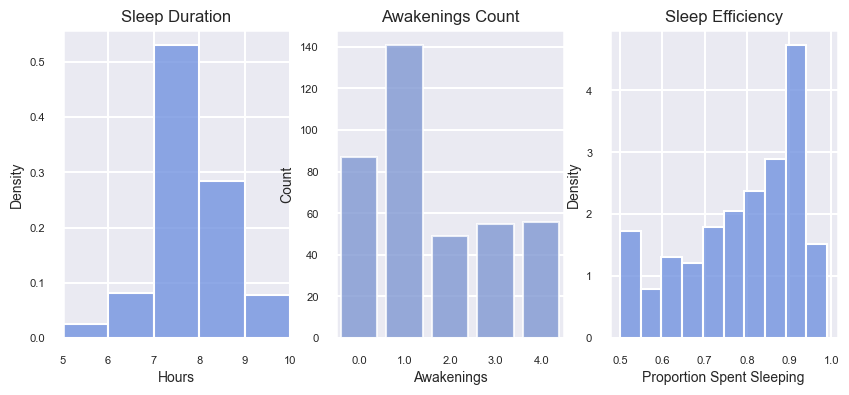

In [22]:
# sleep patterns - duration, awakenings, duration
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.histplot(data=sleep, x='sleep duration', stat='density',color ='#7293e0', alpha=0.8, bins=5)
plt.title('Sleep Duration', fontsize=12)
plt.tick_params(labelsize=8)
plt.xlabel('Hours',fontsize=10)
plt.xlim(5,10)
plt.ylabel('Density',fontsize=10)

plt.subplot(1,3,2)
sns.countplot(x=sleep.get('awakenings'), color ='#7293e0', alpha=0.8)
plt.tick_params(labelsize=8)
plt.xlabel('Awakenings',fontsize=10)
plt.ylabel('Count',fontsize=10)
plt.title('Awakenings Count', fontsize = 12)

plt.subplot(1,3,3)
sns.histplot(data=sleep, x='sleep efficiency', stat='density',color ='#7293e0', alpha=0.8)
plt.title('Sleep Efficiency', fontsize=12)
plt.tick_params(labelsize=8)
plt.xlabel('Proportion Spent Sleeping',fontsize=10)
plt.ylabel('Density',fontsize=10)

plt.show()

**Key Takeaways**: 

- `sleep duration`: Majority of subjects slept for 7-8 hours. 

- `awakenings`: Most subjects woke up at least once during their sleep. 

- `sleep efficiency`: This distribution of slightly right skewed, indicating that most subjects spent the majority of their time **actually** asleep. Every subject has spent at least 50% of their sleep duration actually asleep. 

#### During Sleep

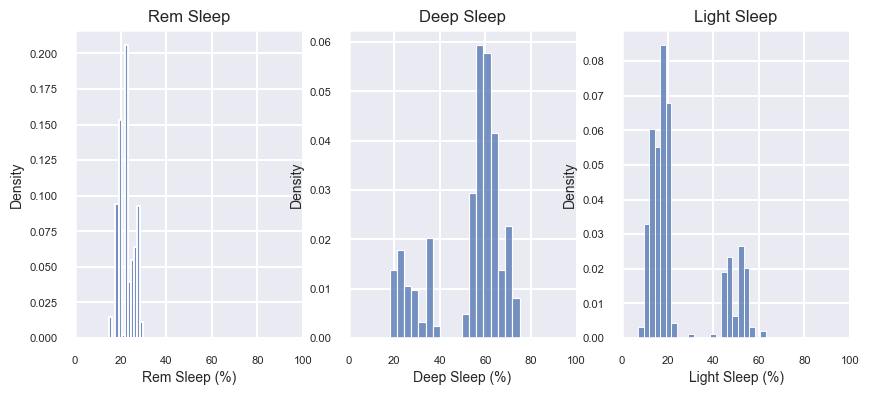

In [23]:
# during sleep 
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.histplot(data=sleep, x='rem sleep %', stat='density')
plt.title('Rem Sleep', fontsize=12)
plt.tick_params(labelsize=8)
plt.xlabel('Rem Sleep (%)',fontsize=10)
plt.xlim(0,100)
plt.ylabel('Density',fontsize=10)

plt.subplot(1,3,2)
sns.histplot(data=sleep, x='deep sleep %', stat='density')
plt.title('Deep Sleep', fontsize=12)
plt.tick_params(labelsize=8)
plt.xlabel('Deep Sleep (%)',fontsize=10)
plt.xlim(0,100)
plt.ylabel('Density',fontsize=10)

plt.subplot(1,3,3)
sns.histplot(data=sleep, x='light sleep %', stat='density')
plt.title('Light Sleep', fontsize=12)
plt.tick_params(labelsize=8)
plt.xlabel('Light Sleep (%)',fontsize=10)
plt.xlim(0,100)
plt.ylabel('Density',fontsize=10)

plt.show()

**Key Takeaways**: 

- `deep sleep` and `light sleep`: Most are bimodal, but their 'larger peaks' are switched: most subjects spent ~60% of their sleep in deep sleep whereas most subjects spent less than 20% of thier sleep in light sleep. 

- `rem sleep`: As expected, most, if not all, spend around 20% in REM sleep. 

## Comparing by Gender

To observe if gender plays a role in overall sleep efficiency, lets compare distributions by gender. To do this, we will create two DataFrames (that are subsets of `sleep`) that are split by gender and named them `male` and `female`. 

In [24]:
# subsetting by gender 
male = sleep[sleep['gender'] == 'Male']
female = sleep[sleep['gender'] == 'Female']

print("Shape for male and female (respectively): " + str(male.shape)+ " " +str(female.shape))

Shape for male and female (respectively): (194, 14) (194, 14)


(As expected, `male` and `female` has the same number of rows!) 

For each column excluding `bedtime`, and `wakeup time` (as these will be accounted for under `sleep duration`), we will create side-by-side visualizations between `male` and `female` distributions to see if there are any noticeable differences between the two. 

In [25]:
columns = ['sleep duration','sleep efficiency', 'rem sleep %', 'deep sleep %', 'light sleep %',
            'awakenings', 'caffeine consumption', 'alcohol consumption','exercise frequency', 'smoking status']

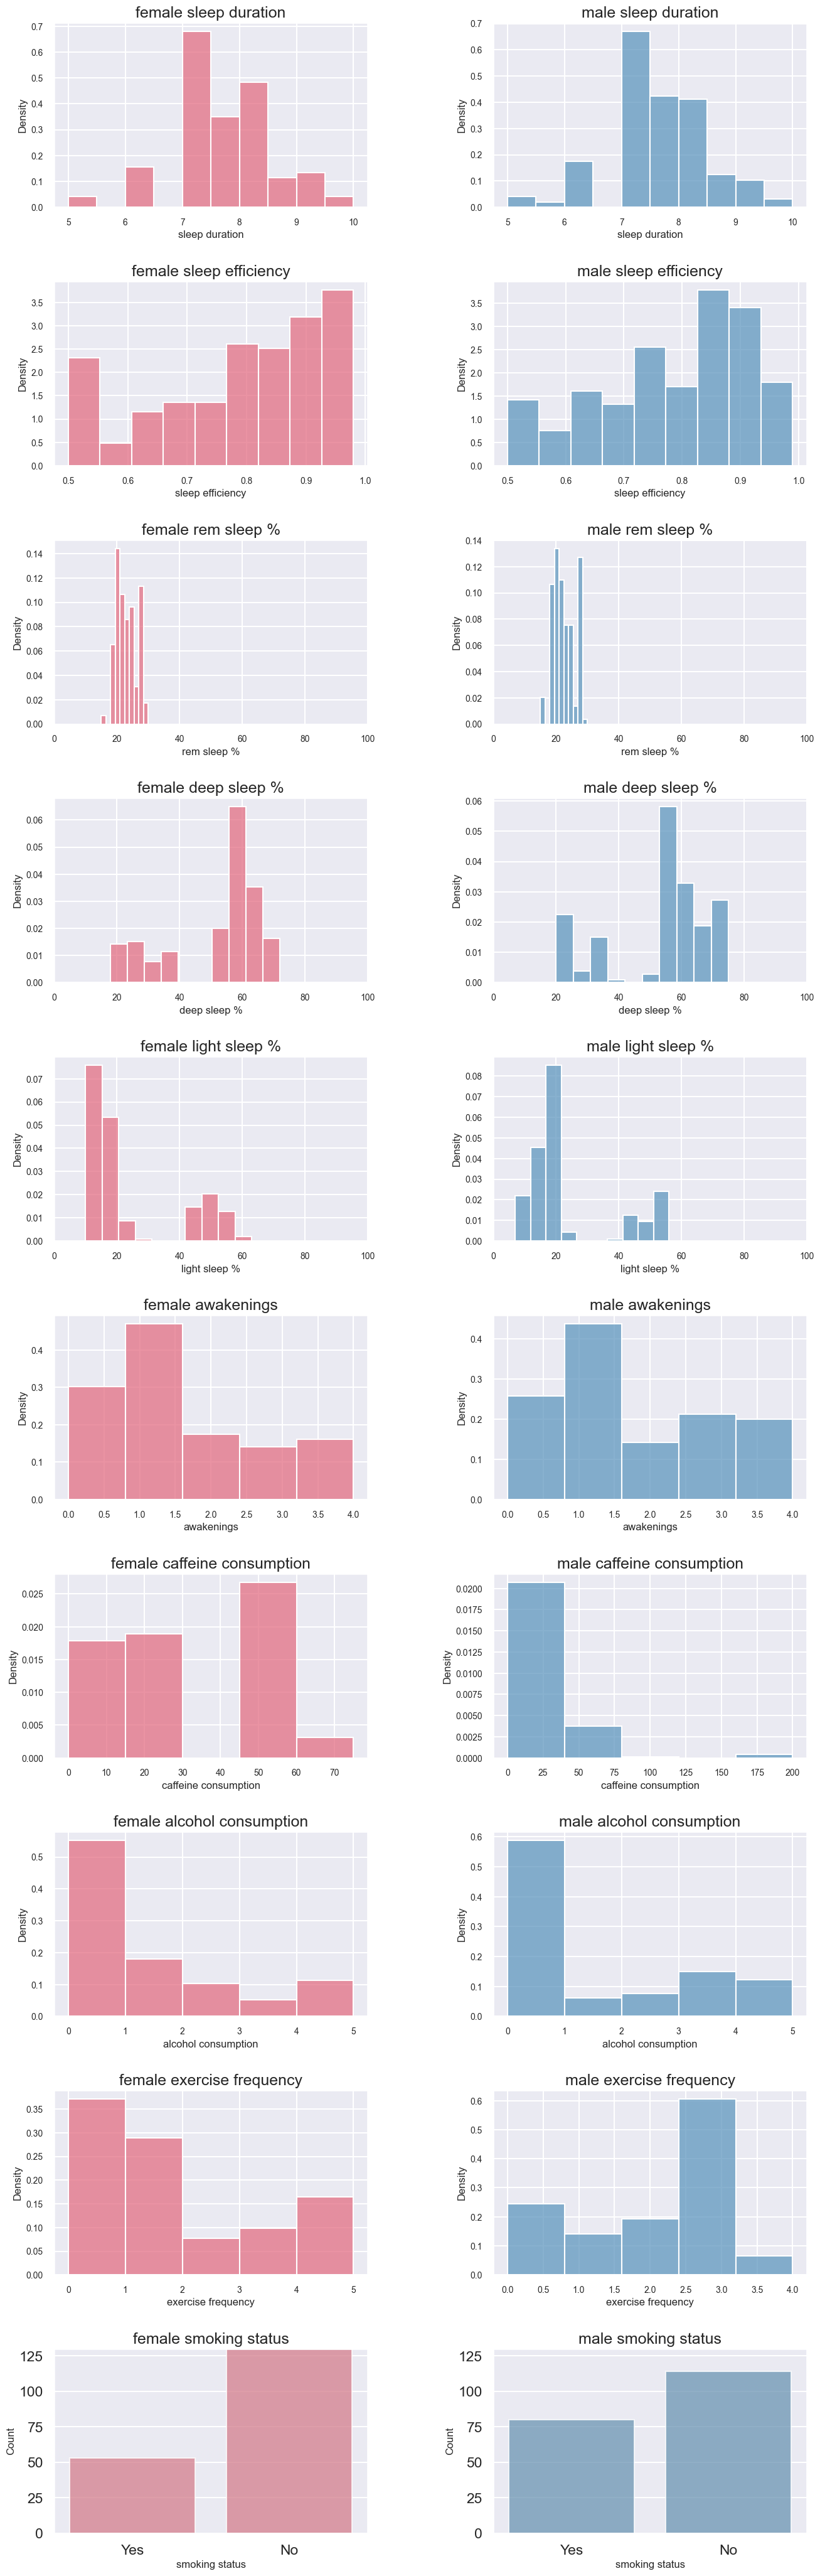

In [26]:
plt.figure(figsize=(15,50))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,wspace=0.4,hspace=0.4)

i = 1
for col in columns: 
    if('smoking' not in col):
        # female
        plt.subplot(10,2,i)
        if col in ['awakenings', 'caffeine consumption', 'alcohol consumption','exercise frequency']:
                sns.histplot(data=female, x=col, stat='density', color='#e36f84', bins = 5)

        elif ('%' in col) | ('duration' in col):
            sns.histplot(data=female, x=col, stat='density', color='#e36f84',bins = 10)

        else:
            sns.histplot(data=female, x=col, stat='density', color='#e36f84')

        plt.title('female ' + col, fontsize=18)
        plt.tick_params(labelsize=10)
        plt.xlabel(col,fontsize=12)
        plt.ylabel('Density',fontsize=12)
        if '%' in col:
            plt.xlim(0,100)


        # male
        plt.subplot(10,2,i+1)
        if col in ['awakenings', 'caffeine consumption', 'alcohol consumption','exercise frequency']:
            sns.histplot(data=male, x=col, stat='density', color="#6097bf", bins = 5)

        elif ('%' in col) | ('duration' in col):
            sns.histplot(data=male, x=col, stat='density', color="#6097bf", bins = 10)

        else:
            sns.histplot(data=male, x=col, stat='density',color="#6097bf")

        plt.title('male ' + col, fontsize=18)
        plt.tick_params(labelsize=10)
        plt.xlabel(col,fontsize=12)
        plt.ylabel('Density',fontsize=12)
        if '%' in col:
            plt.xlim(0,100)
    
    else: 
        #female 
        plt.subplot(10,2,i)
        sns.countplot(x=female.get(col),palette=['#e36f84'], alpha=0.75)  
        plt.title('female ' + col, fontsize=18)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.ylim(0,130)
        
        #male 
        plt.subplot(10,2,i+1)
        sns.countplot(x=male.get(col), palette = ["#6097bf"], alpha=0.75)  
        plt.title('male ' + col, fontsize=18)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.ylim(0,130)
        
    i+=2
    
plt.show()

**Key Takeaways:**

- Most distributions are **very** similar between `male` and `female`--**this suggests that sleeping patterns, schedules, and efficiency may not be too affected by gender**, as we do not see any noticeable differences between the two distributions.  


- `caffeine consumption`, `smoking status`, and `exercise frequency`,show some noticeable differences: 
    - Most female subjects drank more caffeine 24 hours before bed compared to male subjects.
    - There is a larger proportion of smokers amongst males as opposed to females. 
    - Most male subjects exercise 2-3 times a week whereas most female subjects exercised only 0-1 times. 

## Comparing by Age 

To observe if there are changes in sleeping patterns based on age, we will create scatterplots that will compare columns with quantitative data (that is, all columns excluding `gender` and `smoking status`) with age. 

In [27]:
columns_for_age = ['sleep duration','sleep efficiency','rem sleep %','deep sleep %','light sleep %','caffeine consumption',
                     'alcohol consumption','exercise frequency']

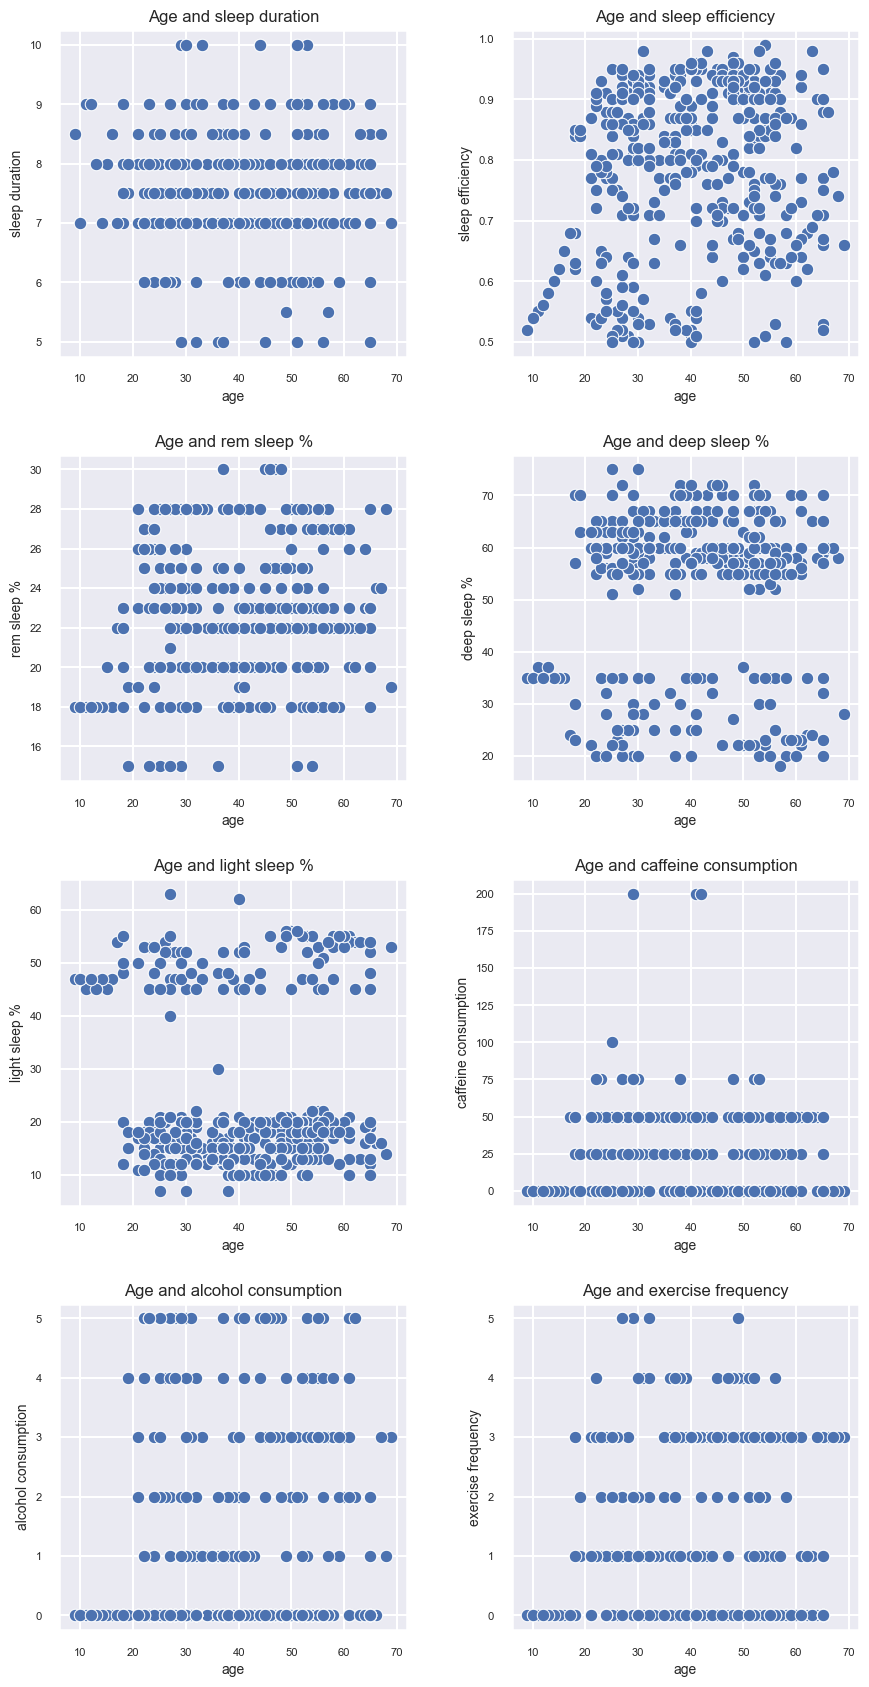

In [28]:
plt.figure(figsize=(10,20))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.3,hspace=0.3)

i = 1
for col in columns_for_age: 
    plt.subplot(4,2,i)
    sns.scatterplot(data=sleep, x='age', y=col)
    plt.tick_params(labelsize=8)
    plt.xlabel('age',fontsize=10)
    plt.ylabel(col,fontsize=10)
    plt.title('Age and ' + col, fontsize=12)
    
    i+=1
    
plt.show()

**Key Takeaways:** 
- All of these scatterplots are evenly disbursed regardless of age-- this suggests that there is no noticeable, strong (linear nor nonlinear) relationship between age and ones' sleep patterns.

## Heatmaps

Since there are no noticeable differences of overall sleep patterns with age and gender, we will instead generate a heatmap to see if there are **any** noticeable correlations between the columns in the dataset.

In [29]:
# Dataframe of correlations 
sleep_corr = sleep.drop(columns=['gender', 'smoking status'])
sleep_corr = sleep_corr.corr()

print('Correlation')
sleep_corr.head()

Correlation


,age,bedtime,wakeup time,sleep duration,sleep efficiency,rem sleep %,deep sleep %,light sleep %,awakenings,caffeine consumption,alcohol consumption,exercise frequency
age,1.000000,-0.071215,0.090218,-0.065951,0.124093,0.015449,0.058156,-0.062613,-0.004006,-0.169057,0.069295,0.071241
bedtime,-0.071215,1.000000,-0.772720,-0.142633,0.162317,-0.013466,0.099440,-0.098123,-0.126751,-0.005986,-0.044666,0.409138
wakeup time,0.090218,-0.772720,1.000000,0.542580,-0.153720,-0.079715,-0.097447,0.116976,0.100085,0.018807,-0.000880,-0.295470
sleep duration,-0.065951,-0.142633,0.542580,1.000000,-0.019164,-0.015408,-0.035477,0.039536,-0.009162,-0.030922,-0.048436,-0.046671
sleep efficiency,0.124093,0.162317,-0.153720,-0.019164,1.000000,0.064038,0.789087,-0.816934,-0.567885,0.070804,-0.397012,0.266050


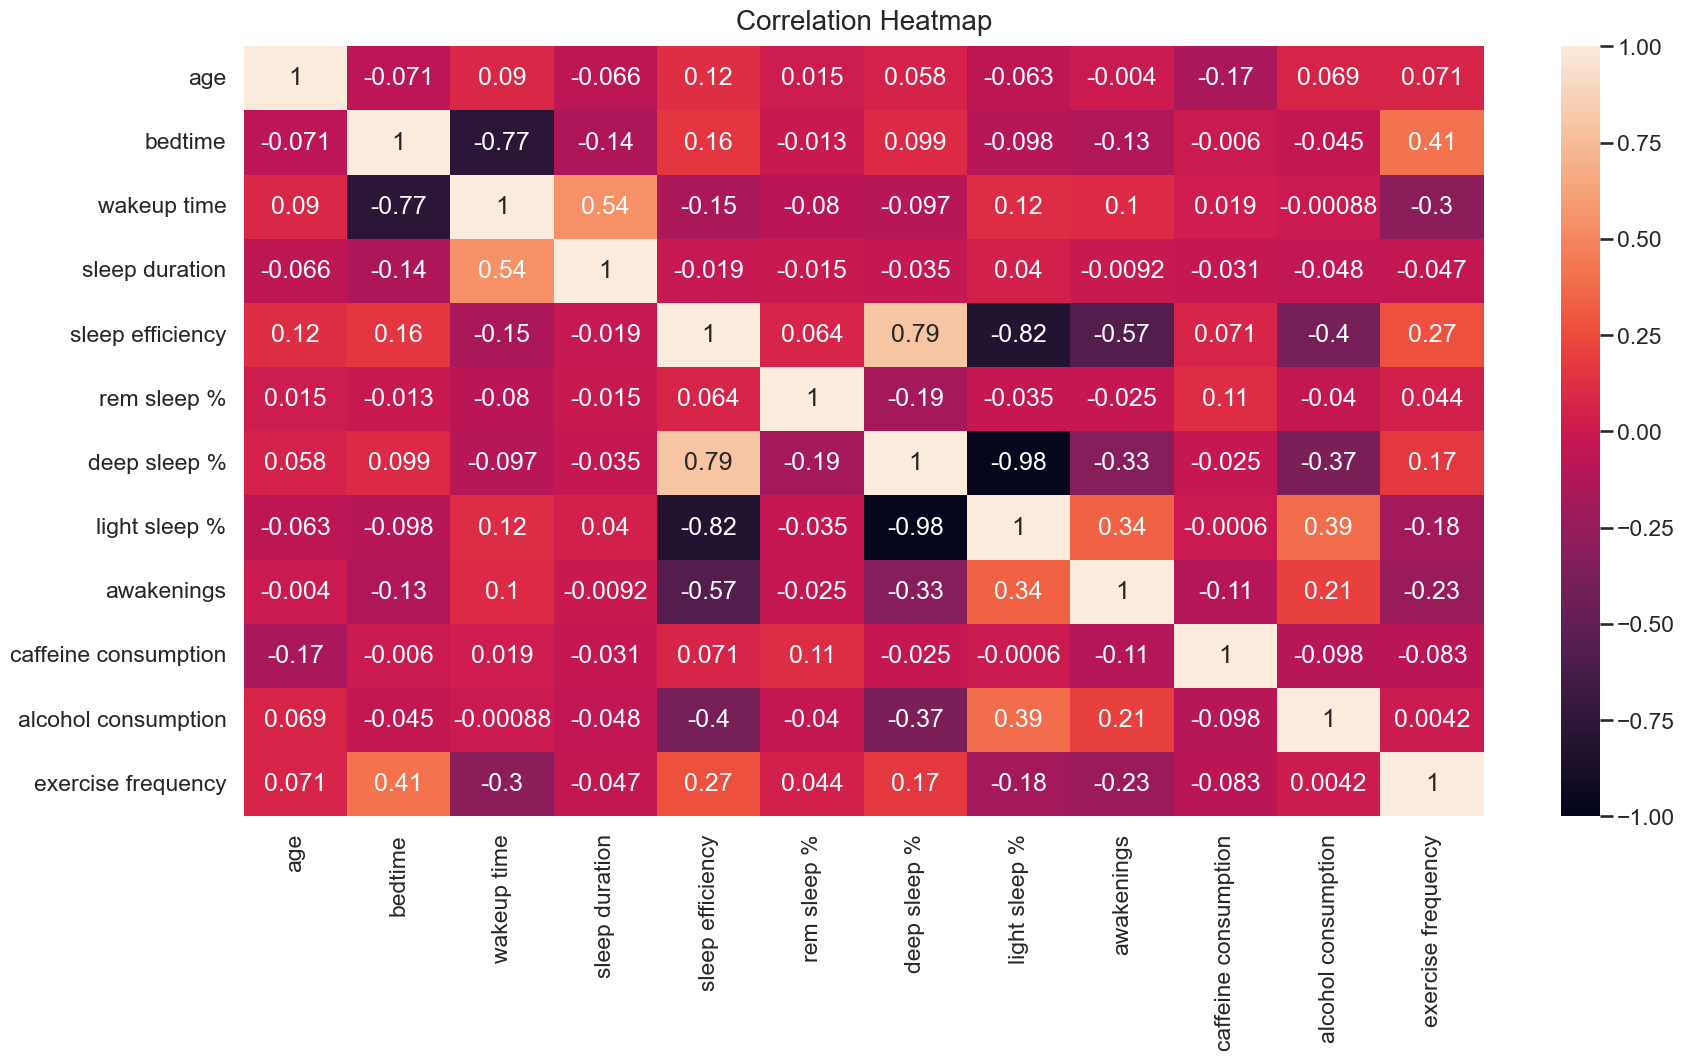

In [30]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(sleep_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)
plt.show()

From observing the Heatmap, we find 6 noticeable correlations that are worth visualizing: 

- `bedtime` and `wakeup time` (correlation: -0.77)
- `sleep duration` and `wakeup time` (correlation: 0.54)
- `awakenings` and `sleep efficiency` (correlation: -0.57)
- `light sleep` and `sleep efficiency` (correlation: -0.82)
- `deep sleep` and `sleep efficiency` (correlation: 0.79)
- `light sleep` and `deep sleep` (correlation: -0.98)

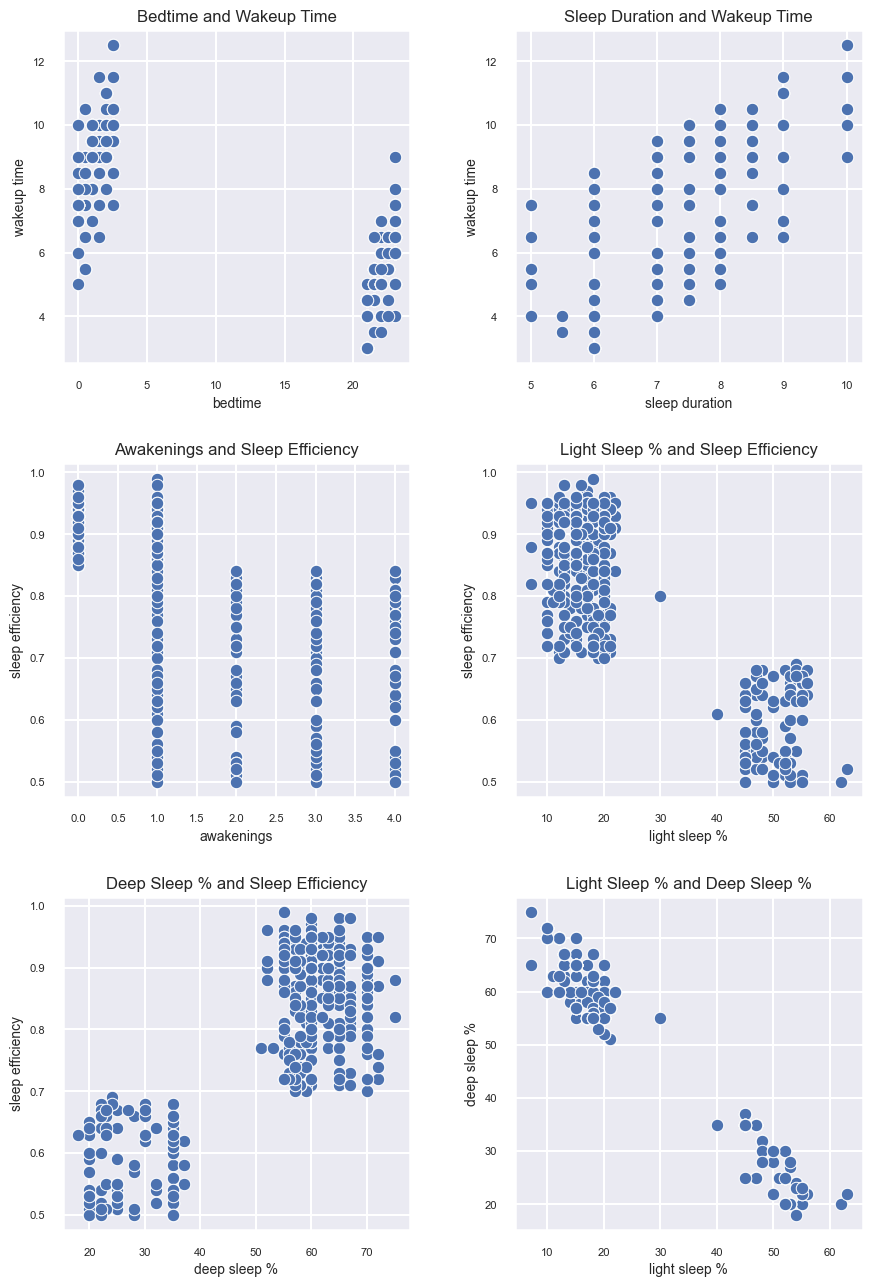

In [31]:
plt.figure(figsize=(10,15))
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.3,hspace=0.3)

plt.subplot(3,2,1)
sns.scatterplot(data=sleep, x='bedtime', y='wakeup time')
plt.tick_params(labelsize=8)
plt.xlabel('bedtime',fontsize=10)
plt.ylabel('wakeup time',fontsize=10)
plt.title('Bedtime and Wakeup Time', fontsize=12)

plt.subplot(3,2,2)
sns.scatterplot(data=sleep, x='sleep duration', y='wakeup time')
plt.tick_params(labelsize=8)
plt.xlabel('sleep duration',fontsize=10)
plt.ylabel('wakeup time',fontsize=10)
plt.title('Sleep Duration and Wakeup Time', fontsize=12)

plt.subplot(3,2,3)
sns.scatterplot(data=sleep, x='awakenings', y='sleep efficiency')
plt.tick_params(labelsize=8)
plt.xlabel('awakenings',fontsize=10)
plt.ylabel('sleep efficiency',fontsize=10)
plt.title('Awakenings and Sleep Efficiency', fontsize=12)

plt.subplot(3,2,4)
sns.scatterplot(data=sleep, x='light sleep %', y='sleep efficiency')
plt.tick_params(labelsize=8)
plt.xlabel('light sleep %',fontsize=10)
plt.ylabel('sleep efficiency',fontsize=10)
plt.title('Light Sleep % and Sleep Efficiency', fontsize=12)

plt.subplot(3,2,5)
sns.scatterplot(data=sleep, x='deep sleep %', y='sleep efficiency')
plt.tick_params(labelsize=8)
plt.xlabel('deep sleep %',fontsize=10)
plt.ylabel('sleep efficiency',fontsize=10)
plt.title('Deep Sleep % and Sleep Efficiency', fontsize=12)


plt.subplot(3,2,6)
sns.scatterplot(data=sleep, x='light sleep %', y='deep sleep %')
plt.tick_params(labelsize=8)
plt.xlabel('light sleep %',fontsize=10)
plt.ylabel('deep sleep %',fontsize=10)
plt.title('Light Sleep % and Deep Sleep %', fontsize=12)

plt.show()

**Key Takeaways:** 

- Though most of these scatterplots are intuitive, it is worth noting that: 

    - Subjects with a later wakeup times also have longer sleep durations
    - Subjects who spend a larger proportion in light sleep has a **lower** sleep efficiency 
    - Subjects who spend a larger proportion in deep sleep has a **higher** sleep efficiency
    - Subjects who spend more time in light sleep spends less time in deep sleep (as expected)
    

## Analyzing Quality of Sleep

Looking back at our hypothesis, we want to see how different demographics and lifestyle habits impacts one's sleep. To do this, we can create a "sleep score" that measures each individual's sleep quality – this measure takes into account his/her sleep duration, sleep efficiency, rem sleep%, deep sleep%, light sleep%, and awakenings. Awakenings and light sleep will be viewed as negative factors in this sleep score as they tend to indicate lower quality of sleep, while the rest of the factors are positive as they tend to indicate a higher quality of sleep. 

### Creating the Sleep Score

In [32]:
# Reset sleep indexes
sleep = sleep.reset_index()

# Initialize sleepsocre
sleepscore = [None] * len(sleep)
sleepmins = sleep.min(axis = 0)
sleepmaxs = sleep.max(axis = 0)

# Create sleepscore
for x in range(len(sleep)):
    sleepscore[x] = (float(sleep['sleep duration'][x]) - float(sleepmins['sleep duration'])) / (float(sleepmaxs['sleep duration']) - float(sleepmins['sleep duration'])) \
    + (float(sleep['sleep efficiency'][x]) - float(sleepmins['sleep efficiency'])) / (float(sleepmaxs['sleep efficiency']) - float(sleepmins['sleep efficiency'])) \
    + (float(sleep['rem sleep %'][x]) - float(sleepmins['rem sleep %'])) / (float(sleepmaxs['rem sleep %']) - float(sleepmins['rem sleep %'])) \
    + (float(sleep['deep sleep %'][x]) - float(sleepmins['deep sleep %'])) / (float(sleepmaxs['deep sleep %']) - float(sleepmins['deep sleep %'])) \
    - (float(sleep['light sleep %'][x]) - float(sleepmins['light sleep %'])) / (float(sleepmaxs['light sleep %']) - float(sleepmins['light sleep %'])) \
    - (float(sleep['awakenings'][x]) - float(sleepmins['awakenings'])) / (float(sleepmaxs['awakenings']) - float(sleepmins['awakenings']))

# Set sleepscore > 0
additionvalue = min(sleepscore)
for x in range(len(sleep)):
    sleepscore[x] = sleepscore[x] - additionvalue
    
# Add sleepscore column
sleep['sleepscore'] = sleepscore

# Drop not needed columns
sleep = sleep.drop(['index', 'sleep duration', 'sleep efficiency', 'rem sleep %', 'deep sleep %', 'light sleep %', 'awakenings'], axis=1)

# Show modified dataframe
sleep

,age,gender,bedtime,wakeup time,caffeine consumption,alcohol consumption,smoking status,exercise frequency,sleepscore
0,65,Female,1.0,7.0,0.0,0.0,Yes,3.0,2.995560
1,69,Male,2.0,9.0,0.0,3.0,Yes,3.0,0.594262
2,40,Female,21.5,5.5,0.0,0.0,No,3.0,3.335016
3,40,Female,2.5,8.5,50.0,5.0,Yes,1.0,0.320032
4,57,Male,1.0,9.0,0.0,3.0,No,3.0,2.630362
...,...,...,...,...,...,...,...,...,...
383,30,Female,23.0,6.5,50.0,2.0,Yes,1.0,0.656463
384,27,Female,22.0,5.5,0.0,0.0,No,5.0,3.234667
385,52,Male,21.0,3.0,25.0,0.0,No,3.0,2.094871
386,45,Male,21.0,4.0,0.0,0.0,No,3.0,2.271464


### Visualizing Sleep Score Correlations

To visualize how different lifestyle habits and demographics impact the sleep score, we can create scatterplots for each habit and demographic with a line of best fit.

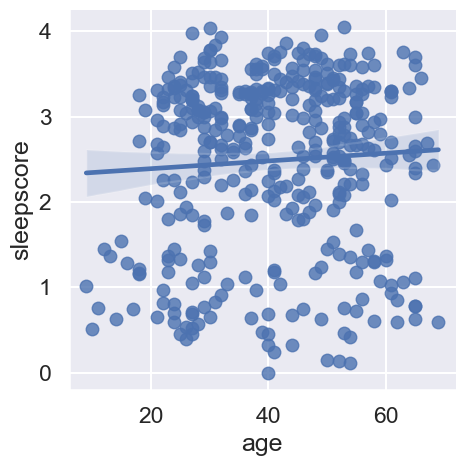

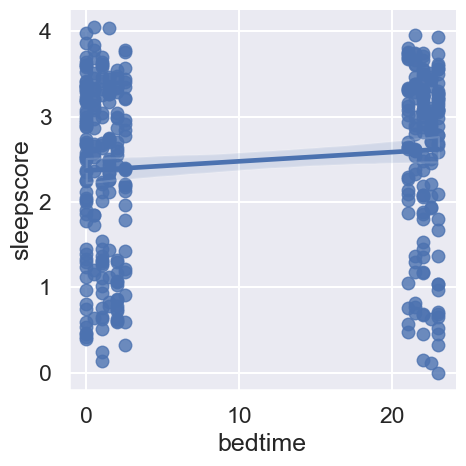

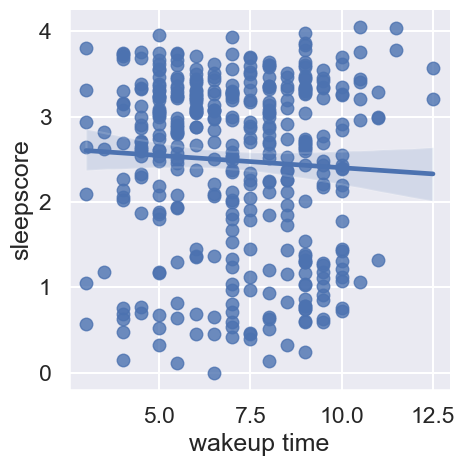

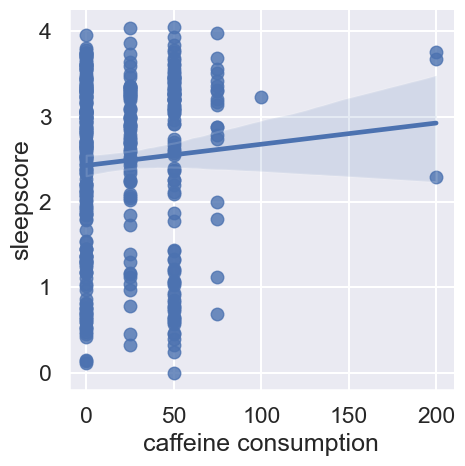

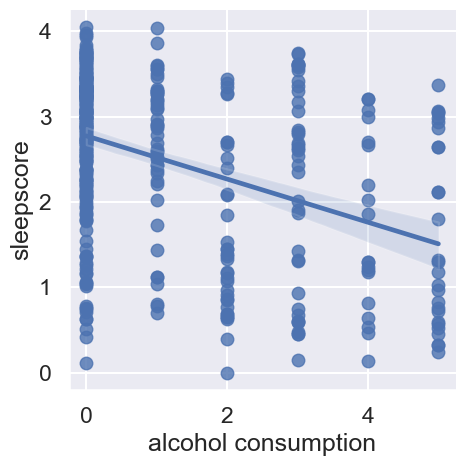

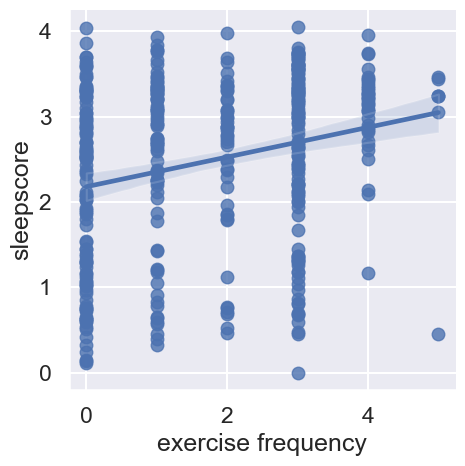

In [33]:
# Create the scatter plot with line of best fit for all possible variables
sns.lmplot(x='age', y='sleepscore', data=sleep)

# gender will not work with a scatter plot
# sns.lmplot(x='gender', y='sleepscore', data=sleep)

sns.lmplot(x='bedtime', y='sleepscore', data=sleep)

sns.lmplot(x='wakeup time', y='sleepscore', data=sleep)

sns.lmplot(x='caffeine consumption', y='sleepscore', data=sleep)

sns.lmplot(x='alcohol consumption', y='sleepscore', data=sleep)

# smoking status will not work with a scatter plot
# sns.lmplot(x='smoking status', y='sleepscore', data=sleep)

sns.lmplot(x='exercise frequency', y='sleepscore', data=sleep)

### Taking a Closer Look

From the data it can be seen that exercise frequency seems to be strongly positively correlated to sleepscore, and alcohol consumption shows a strong negative correlation with sleep score. Even with the visualizations, it may be difficult to see the correlation for other features. Therefore, we will create linear models for each factor that could impact sleep.

In [34]:
outcome_1, predictors_1 = patsy.dmatrices('sleepscore ~ age', sleep)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

outcome_1, predictors_1 = patsy.dmatrices('sleepscore ~ gender', sleep)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_2 = mod_1.fit()

outcome_1, predictors_1 = patsy.dmatrices('sleepscore ~ bedtime', sleep)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_3 = mod_1.fit()

outcome_1, predictors_1 = patsy.dmatrices('sleepscore ~ Q("wakeup time")', sleep)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_4 = mod_1.fit()

outcome_1, predictors_1 = patsy.dmatrices('sleepscore ~ Q("caffeine consumption")', sleep)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_5 = mod_1.fit()

outcome_1, predictors_1 = patsy.dmatrices('sleepscore ~ Q("alcohol consumption")', sleep)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_6 = mod_1.fit()

outcome_1, predictors_1 = patsy.dmatrices('sleepscore ~ Q("smoking status")', sleep)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_7 = mod_1.fit()

outcome_1, predictors_1 = patsy.dmatrices('sleepscore ~ Q("exercise frequency")', sleep)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_8 = mod_1.fit()

### Analyzing the Linear Models

Let's look at all variables using their OLS Regression Results.

In [35]:
res_1.summary() # Age and sleepscore

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleepscore   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.386
Date:                Fri, 24 Mar 2023   Prob (F-statistic):              0.240
Time:                        09:46:15   Log-Likelihood:                -554.54
No. Observations:                 388   AIC:                             1113.
Df Residuals:                     386   BIC:                             1121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2988      0.165     13.926      0.000       1.974       2.623
age            0.0045      0.004      1.177      0.240      -0.003       0.012
==============================================================================
Omnibus:                       43.615   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.783
Skew:                          -0.696   Prob(JB):                     3.79e-09
Kurtosis:                       2.321   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Age does not seem to show a strong correlation, which matches with the line of best fit.

In [36]:
res_2.summary() # Gender and sleepscore

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleepscore   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6701
Date:                Fri, 24 Mar 2023   Prob (F-statistic):              0.414
Time:                        09:46:15   Log-Likelihood:                -554.90
No. Observations:                 388   AIC:                             1114.
Df Residuals:                     386   BIC:                             1122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.5256      0.073     34.695      0.000       2.382       2.669
gender[T.Male]    -0.0843      0.103     -0.819      0.414      -0.287       0.118
==============================================================================
Omnibus:                       43.695   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.161
Skew:                          -0.715   Prob(JB):                     1.90e-09
Kurtosis:                       2.336   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Gender does not seem to show a strong correlation.

In [37]:
res_3.summary() # Bedtime and sleepscore

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleepscore   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.914
Date:                Fri, 24 Mar 2023   Prob (F-statistic):             0.0272
Time:                        09:46:15   Log-Likelihood:                -552.78
No. Observations:                 388   AIC:                             1110.
Df Residuals:                     386   BIC:                             1117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3676      0.073     32.372      0.000       2.224       2.511
bedtime        0.0108      0.005      2.217      0.027       0.001       0.020
==============================================================================
Omnibus:                       39.117   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.724
Skew:                          -0.700   Prob(JB):                     6.43e-09
Kurtosis:                       2.389   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While bedtime did not seem to show a strong correlation in the visualization, from looking at the summary it has a strong correlation to sleepscore.

In [38]:
res_4.summary() # Wakeup time and sleepscore

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleepscore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.245
Date:                Fri, 24 Mar 2023   Prob (F-statistic):              0.265
Time:                        09:46:15   Log-Likelihood:                -554.61
No. Observations:                 388   AIC:                             1113.
Df Residuals:                     386   BIC:                             1121.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.6880      0.190     14.114      0.000       2.314       3.062
Q("wakeup time")    -0.0288      0.026     -1.116      0.265      -0.080       0.022
==============================================================================
Omnibus:                       41.544   Durbin-Watson:                   2.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.051
Skew:                          -0.694   Prob(JB):                     5.46e-09
Kurtosis:                       2.346   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wakeup time does not appear to show a strong correlation to sleepscore.

In [39]:
res_5.summary() # caffeine consumption and sleepscore

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleepscore   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.955
Date:                Fri, 24 Mar 2023   Prob (F-statistic):              0.163
Time:                        09:46:15   Log-Likelihood:                -554.26
No. Observations:                 388   AIC:                             1113.
Df Residuals:                     386   BIC:                             1120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.4271      0.065     37.186      0.000       2.299       2.555
Q("caffeine consumption")     0.0025      0.002      1.398      0.163      -0.001       0.006
==============================================================================
Omnibus:                       43.371   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.221
Skew:                          -0.717   Prob(JB):                     1.85e-09
Kurtosis:                       2.342   Cond. No.                         46.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Caffeine consumption does not appear to show a strong correlation to sleepscore.

In [40]:
res_6.summary() # Alcohol consumption and sleepscore

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleepscore   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     74.52
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           1.59e-16
Time:                        09:46:15   Log-Likelihood:                -520.99
No. Observations:                 388   AIC:                             1046.
Df Residuals:                     386   BIC:                             1054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    2.7733      0.058     47.898      0.000       2.660       2.887
Q("alcohol consumption")    -0.2528      0.029     -8.633      0.000      -0.310      -0.195
==============================================================================
Omnibus:                       20.788   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.778
Skew:                          -0.499   Prob(JB):                     5.07e-05
Kurtosis:                       2.521   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Alcohol consumption and sleepscore are strongly negatively correlated which matches the visualization.

In [41]:
res_7.summary() # Smoking status and sleepscore

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleepscore   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     13.31
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           0.000300
Time:                        09:46:15   Log-Likelihood:                -548.66
No. Observations:                 388   AIC:                             1101.
Df Residuals:                     386   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      2.6169      0.062     41.884      0.000       2.494       2.740
Q("smoking status")[T.Yes]    -0.3894      0.107     -3.649      0.000      -0.599      -0.180
==============================================================================
Omnibus:                       42.320   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.304
Skew:                          -0.574   Prob(JB):                     2.63e-07
Kurtosis:                       2.253   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Smoking status seems to be strongly negatively correlated with sleepscore.

In [42]:
res_8.summary() # Exercise frequency and sleepscore

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sleepscore   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     25.32
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           7.46e-07
Time:                        09:46:15   Log-Likelihood:                -542.91
No. Observations:                 388   AIC:                             1090.
Df Residuals:                     386   BIC:                             1098.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.1782      0.079     27.727      0.000       2.024       2.333
Q("exercise frequency")     0.1737      0.035      5.032      0.000       0.106       0.242
==============================================================================
Omnibus:                       33.413   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.643
Skew:                          -0.652   Prob(JB):                     8.16e-08
Kurtosis:                       2.437   Cond. No.                         4.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Exercise frequency and sleepscore seem to be strongly positively correlated which matches the visualization.

# Ethics & Privacy

The dataset that we chose to use for our project was publicly available and we did not find any permission restrictions. The data does include observations such as whether an individual uses substances like alcohol or tobacco which may be information that individuals would want to keep private. However, our group does not have substantial concerns regarding individual privacy because the data set includes minimal personal information that would be able to single out an individual. All observed subjects are identified with an ID number which helps protect their identity from being revealed. 

While there is always the potential for bias within datasets, the dataset that we used has a wide range of values for each column observation which can help to mitigate concerns on the potential for bias. One source of bias may be the region of data collection – if all of the observations in our dataset were taken from one region/area, it may be important for us to consider how generalizable our analysis and conclusion can be to other regions and the general public. Something to consider for future projects is the fact that sleep can be affected by many different factors as seen in the background information section and even our data analysis. For example, an individual’s sleep environment or pre-existing health conditions may be a primary determinant for his or her sleep score. With more detailed information about the individuals and any other potential factors or habits that might impact sleep, we may be able to increase the validity of our conclusions. If we identify any issues regarding privacy, ethics or bias, we will aim to remove the data to ensure that it does not impact the rest of our analysis. 

# Conclusion & Discussion

From analyzing the data, exercise frequency and bedtime appear to show a statistically significant positive correlation with sleep score. On the other hand, smoking status and alcohol consumption show a statistically significant negative correlation with sleep score. Since sleep score is a measure of quality of sleep that takes into account sleep duration, sleep efficiency, rem sleep%, deep sleep%, light sleep%, and awakenings, it can be said that more exercise and an earlier bedtime may have a positive correlation with one's quality of sleep. It can also be said that smoking and consuming more alcohol may have a negative correlation with one's quality of sleep.

Looking back at our hypothesis, we had varying degrees of correctness. In regards to the prediction of older individuals having a lower sleep score, this was wrong as age did not show a correlation to sleep score. However, we were right in that gender did not have a significant impact on one's sleep score since it did not have a correlation to sleep score. Overall, we were correct in that life style habits provided a more accurate prediction of an individual's sleep score when compared to demographic factors. While substance use of caffeine did not have a strong correlation with sleep score, bedtime, exercise, smoking status, and alcohol all showed strong correlations, either negative or positive.

# Video Submission Location

Our group uploaded the video to our GitHub repository and can be downloaded for view. Here is also a Google Drive link that can lead you to our video if the first option does not work: https://drive.google.com/file/d/1J2Fcvhi6uOc1p-fwr59W07yUqAnAZwHK/view?usp=sharing

# Team Contributions

- Leena Kang: data research, data cleaning, data visualization and analysis 

- Stephanie Park: data research, writing and editing

- Jorge Miguel Hernandez: data research, writing and editing

- Nicholas Azpeitia: data research, data cleaning, data visualization and analysis